## কার্টপোল স্কেটিং

> **সমস্যা**: যদি পিটারকে নেকড়ের কাছ থেকে পালাতে হয়, তাহলে তাকে নেকড়ের চেয়ে দ্রুত চলতে সক্ষম হতে হবে। আমরা দেখব কীভাবে পিটার স্কেটিং শিখতে পারে, বিশেষ করে, ভারসাম্য বজায় রাখতে, Q-Learning ব্যবহার করে।

প্রথমে, জিম ইনস্টল করি এবং প্রয়োজনীয় লাইব্রেরিগুলো ইমপোর্ট করি:


In [1]:
#code block 1

## একটি কার্টপোল পরিবেশ তৈরি করুন


In [ ]:
#code block 2

পরিবেশ কীভাবে কাজ করে তা দেখতে, চলুন ১০০ ধাপের জন্য একটি ছোট সিমুলেশন চালাই।


In [ ]:
#code block 3

সিমুলেশনের সময়, আমাদের পর্যবেক্ষণগুলি পেতে হবে যাতে সিদ্ধান্ত নেওয়া যায় কীভাবে কাজ করতে হবে। প্রকৃতপক্ষে, `step` ফাংশন আমাদের বর্তমান পর্যবেক্ষণ, পুরস্কার ফাংশন এবং `done` ফ্ল্যাগ ফেরত দেয় যা নির্দেশ করে যে সিমুলেশন চালিয়ে যাওয়া অর্থপূর্ণ কিনা:


In [ ]:
#code block 4

আমরা সেই সংখ্যাগুলোর সর্বনিম্ন এবং সর্বোচ্চ মান পেতে পারি:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

চলুন বিন ব্যবহার করে অন্যান্য বিচ্ছিন্নকরণ পদ্ধতি অন্বেষণ করি:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


এবার একটি সংক্ষিপ্ত সিমুলেশন চালাই এবং সেই বিচ্ছিন্ন পরিবেশের মানগুলি পর্যবেক্ষণ করি।


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## কিউ-টেবিলের গঠন


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


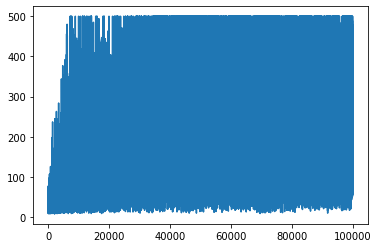

In [20]:
plt.plot(rewards)

এই গ্রাফ থেকে কিছু বলা সম্ভব নয়, কারণ স্টোকাস্টিক প্রশিক্ষণ প্রক্রিয়ার প্রকৃতির কারণে প্রশিক্ষণ সেশনের দৈর্ঘ্য ব্যাপকভাবে পরিবর্তিত হয়। এই গ্রাফটি আরও অর্থবহ করতে, আমরা পরীক্ষার সিরিজের উপর **চলমান গড়** গণনা করতে পারি, ধরুন ১০০। এটি সুবিধাজনকভাবে `np.convolve` ব্যবহার করে করা যেতে পারে:


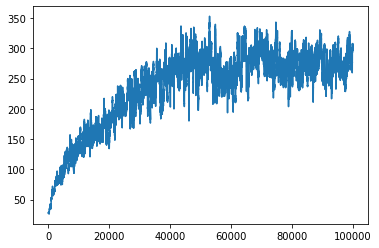

In [22]:
#code block 12

## হাইপারপ্যারামিটার পরিবর্তন এবং ফলাফল পর্যবেক্ষণ

এখন এটি দেখতে আকর্ষণীয় হবে যে প্রশিক্ষিত মডেলটি কীভাবে আচরণ করে। চলুন সিমুলেশন চালাই, এবং আমরা প্রশিক্ষণের সময় ব্যবহৃত একই অ্যাকশন নির্বাচন কৌশল অনুসরণ করব: Q-টেবিলের প্রোবাবিলিটি ডিস্ট্রিবিউশন অনুযায়ী স্যাম্পলিং করা:


In [23]:
# code block 13

## ফলাফল একটি অ্যানিমেটেড GIF-এ সংরক্ষণ করা

আপনি যদি আপনার বন্ধুদের মুগ্ধ করতে চান, তাহলে আপনি ব্যালেন্সিং পোলের অ্যানিমেটেড GIF ছবি পাঠাতে পারেন। এটি করতে, আমরা `env.render` ব্যবহার করে একটি ইমেজ ফ্রেম তৈরি করতে পারি এবং তারপর সেগুলো PIL লাইব্রেরি ব্যবহার করে অ্যানিমেটেড GIF-এ সংরক্ষণ করতে পারি:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিক অনুবাদ প্রদানের চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা দায়বদ্ধ থাকব না।
